# Praxisteil II: Bayessche Hierarchische Modelle

__Bayesian Workflow__

1. Exploration der Daten
2. Bauen des Modells
3. Prior Predictive Check
4. Modell Fitting
5. Posterior Predictive Check
6. Parameter Inferenz

7. Modellvergleich (LM vs. BHM)

8. Modell verbessern

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import pymc3 as pm
import arviz as az
import numpy as np

import math
import warnings
warnings.filterwarnings('ignore')

kwargs_sampler = {'chains': 4,'cores': 4}#, 'return_inferencedata': True}

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [17]:
# Plotting
def plot_by_group(y,x,num_groups,group_idx,trace=None,fit=False):
    
    # Get number of rows and columns to plot
    if num_groups<=3:
        num_cols = num_groups
    else:
        num_cols = 3
    num_rows = math.ceil(num_groups/3)

    # Set up plot
    fig, ax = plt.subplots(num_rows, num_cols, figsize=(20,10), sharex=True, sharey=True)
    ax = np.ravel(ax)

    # Plot each group
    x_range = np.linspace(x.min(), x.max(), 10)
    j = 0
    k = len(group_idx[group_idx==j])
    for i in range(num_groups):
        ax[i].scatter(x[j:k], y[j:k])
        ax[i].set_title(f"Group {i+1}", fontsize=15)
        
        if trace is not None:
            alpha_m = trace['beta_0'][:,i].mean()
            beta_m = trace['beta_1'][:, i].mean()
            
            ax[i].plot(x_range, alpha_m + beta_m * x_range, c='k',
                       label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')
        if fit:
            coef = np.polyfit(x[j:k], y[j:k],1)
            alpha_m = coef[1]
            beta_m = coef[0]
        
            ax[i].plot(x_range, alpha_m + beta_m * x_range, c='k',
                       label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')
            
        
        j += (group_idx==i).sum()
        k += (group_idx==i).sum()

    # Set common x and y axis
    fig.text(0.5, 0.07, 'Price', ha='center', fontsize=20)
    fig.text(0.09, 0.5, 'Sales', va='center', rotation='vertical', fontsize=20)

## Exploration der Daten

In [3]:
# Load data
df = pd.read_csv('../data/dataset_sim.csv')
df.head()

,Sales,Price,Store
0,48.484536,5.749164,0
1,43.640838,4.796067,0
2,48.609230,4.817825,0
3,45.924189,5.680656,0
4,57.832635,3.181501,0


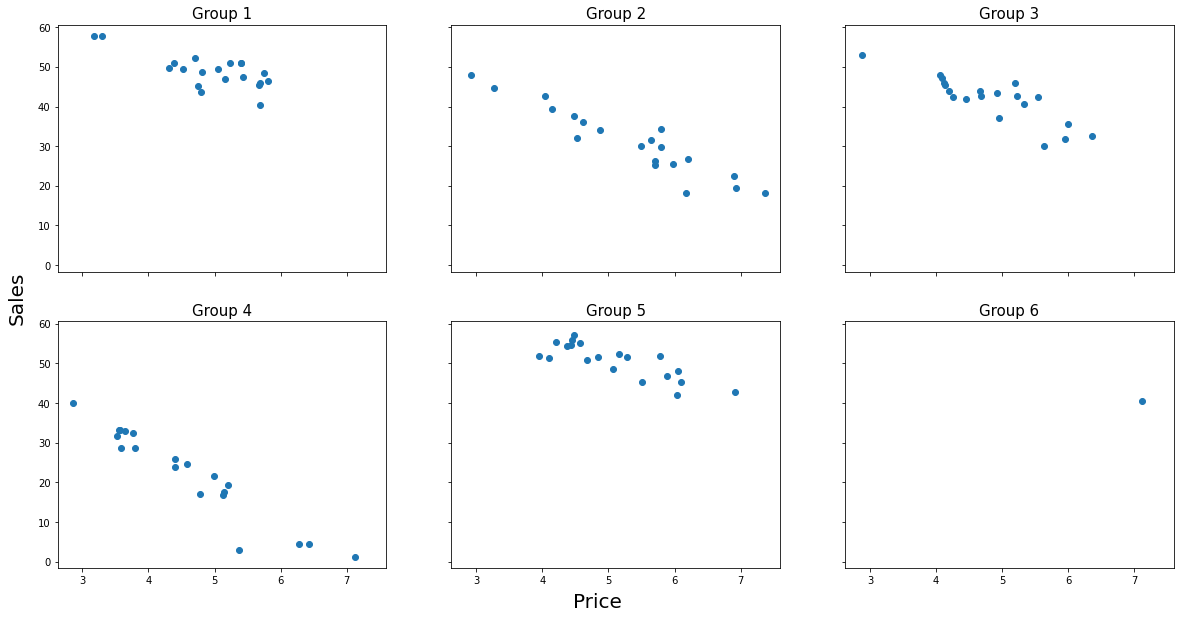

In [18]:
# Plot sales by groups
num_groups = df.Store.nunique()
group_idx = df.Store.to_numpy()

plot_by_group(df['Sales'],df['Price'],num_groups,group_idx)

## Bauen des Modells

### Bayessches Hierarchisches Modell

In [ ]:
with pm.Model() as linear_model:
    
    # Hyperparameters
    beta_0 = pm.Normal('beta_0', mu=0, sd=100)
    beta_1 = pm.Normal('beta_1', mu=-20, sd=50)
    eps = pm.HalfNormal('eps', 5)
    
    # Calculate mean of normal distribution (conditioning)
    mu = beta_0 + beta_1*df['Price']
    
    # Conditional normal distribution
    sales_pred = pm.Normal('sales_pred',mu=mu,sd=eps,observed=df['Sales'])

### Pymc3 Implementierung

## Prior predictive Check

More information about MCMC sampling and convergence checks: 

## Model fitting

## Convergence Check

## Posterior Predictive Check

## Parameter inference

## Modellvergleich

## Conclusion